In [1]:
!pip install yfinance

In [2]:
import yfinance as yf

In [3]:
df = yf.download('UTC-USD')

[*********************100%%**********************]  1 of 1 completed


In [4]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-22,0.988407,1.000427,0.984352,0.998326,0.998326,109226
2022-03-23,0.998339,1.090443,0.944837,0.976418,0.976418,119846
2022-03-24,0.976456,96.752182,0.954138,1.185126,1.185126,152960
2022-03-25,1.185131,1.192514,1.180614,1.188583,1.188583,127456
2022-03-26,1.188603,1.212403,1.181608,1.191077,1.191077,130188
...,...,...,...,...,...,...
2023-06-01,3.913131,3.913131,3.913131,3.913131,3.913131,0
2023-06-02,3.913131,3.913131,3.913131,3.913131,3.913131,0
2023-06-03,3.913131,3.913131,3.913131,3.913131,3.913131,0


In [6]:
!pip install statsmodels

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error , mean_absolute_error

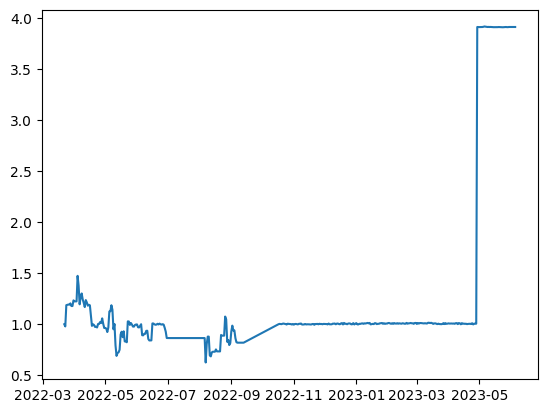

In [10]:
plt.plot(df.index,df['Adj Close'])
plt.show()